In [72]:
import os
import json
from IPython.display import display, clear_output
import pandas as pd

In [2]:
def read_file(file):
    with open(file, 'rt') as fd:
        first_line = fd.readline()
    return first_line

In [3]:
path="/home/jb2328/Decoder/b64_decoder/data_bin/2020/03/"

In [52]:
dirs=sorted(os.listdir("/home/jb2328/Decoder/b64_decoder/data_bin/2020/03/"))

In [5]:
files=sorted(os.listdir("/home/jb2328/Decoder/b64_decoder/data_bin/2020/03/04"))

In [6]:
files

['1583280005_00:00-04-03-2020.json',
 '1583280038_00:00-04-03-2020.json',
 '1583280071_00:01-04-03-2020.json',
 '1583280103_00:01-04-03-2020.json',
 '1583280104_00:01-04-03-2020.json',
 '1583280137_00:02-04-03-2020.json',
 '1583280140_00:02-04-03-2020.json',
 '1583280170_00:02-04-03-2020.json',
 '1583280182_00:03-04-03-2020.json',
 '1583280203_00:03-04-03-2020.json',
 '1583280236_00:03-04-03-2020.json',
 '1583280269_00:04-04-03-2020.json',
 '1583280303_00:05-04-03-2020.json',
 '1583280336_00:05-04-03-2020.json',
 '1583280369_00:06-04-03-2020.json',
 '1583280402_00:06-04-03-2020.json',
 '1583280403_00:06-04-03-2020.json',
 '1583280434_00:07-04-03-2020.json',
 '1583280435_00:07-04-03-2020.json',
 '1583280440_00:07-04-03-2020.json',
 '1583280468_00:07-04-03-2020.json',
 '1583280483_00:08-04-03-2020.json',
 '1583280501_00:08-04-03-2020.json',
 '1583280534_00:08-04-03-2020.json',
 '1583280567_00:09-04-03-2020.json',
 '1583280601_00:10-04-03-2020.json',
 '1583280634_00:10-04-03-2020.json',
 

In [180]:
FN07=['elsys-co2-041ba9',
'elsys-co2-0461e7','elsys-eye-044501', 'elsys-eye-044504']

In [53]:
dirs

['03', '04', '05']

In [167]:
data=[]
for i in ["05"]:
    path="/home/jb2328/Decoder/b64_decoder/data_bin/2020/03/"+i+"/"
    files=sorted(os.listdir(path))
    for u in files:
        msg=read_file(path+u)
        clear_output(wait=True)
        display(path+u)
        #display(msg)        
        #try:
        msg_json=eval(msg)#json.loads(msg)
       # except:
        #    continue
        #if msg_json["dev_id"]!="ijl20-sodaq-ttn":
            #print(msg_json["dev_id"])
          
        if msg_json["dev_id"]=='elsys-co2-041ba9' or msg_json["dev_id"]=='elsys-co2-0461e7':
            #display("Found")
            try:
                data.append({"id":msg_json["dev_id"], "time":msg_json["acp_ts"], "co2":msg_json["payload_cooked"]["co2"]})
            except:
                continue

'/home/jb2328/Decoder/b64_decoder/data_bin/2020/03/05/1583420634_15:03-05-03-2020.json'

In [168]:
len(data)

71

In [169]:
data

[{'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T11:26:32.971623271Z',
  'co2': 678},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-03-05T12:02:25.089536152Z',
  'co2': 636},
 {'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T12:06:32.805253619Z',
  'co2': 773},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-03-05T12:07:25.07388938Z',
  'co2': 638},
 {'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T12:11:32.786872263Z',
  'co2': 773},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-03-05T12:12:25.043110263Z',
  'co2': 639},
 {'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T12:16:32.768619206Z',
  'co2': 749},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-03-05T12:17:25.030596788Z',
  'co2': 611},
 {'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T12:21:32.741928838Z',
  'co2': 740},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-03-05T12:22:25.003348422Z',
  'co2': 605},
 {'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T12:26:32.71828435Z',
  'co2': 731},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-0

In [170]:
#i["time"].split("T")[1].split(".")[0]
df = pd.DataFrame()
index=0
for i in data:
    #print({"time": i["time"], "id": i["id"], "co2": i["co2"]})
    df=df.append({"time": pd.to_datetime(i["time"]), "id": i["id"], "co2": i["co2"]}, ignore_index=True)
    index+=1

In [171]:
df.head()

,co2,id,time
0,678.0,elsys-co2-041ba9,2020-03-05 11:26:32.971623271+00:00
1,636.0,elsys-co2-0461e7,2020-03-05 12:02:25.089536152+00:00
2,773.0,elsys-co2-041ba9,2020-03-05 12:06:32.805253619+00:00
3,638.0,elsys-co2-0461e7,2020-03-05 12:07:25.073889380+00:00
4,773.0,elsys-co2-041ba9,2020-03-05 12:11:32.786872263+00:00


In [172]:
ba9=df.loc[df['id'] == 'elsys-co2-041ba9']
e7=df.loc[df['id'] == 'elsys-co2-0461e7']


In [173]:
ba9

,co2,id,time
0,678.0,elsys-co2-041ba9,2020-03-05 11:26:32.971623271+00:00
2,773.0,elsys-co2-041ba9,2020-03-05 12:06:32.805253619+00:00
4,773.0,elsys-co2-041ba9,2020-03-05 12:11:32.786872263+00:00
6,749.0,elsys-co2-041ba9,2020-03-05 12:16:32.768619206+00:00
8,740.0,elsys-co2-041ba9,2020-03-05 12:21:32.741928838+00:00
10,731.0,elsys-co2-041ba9,2020-03-05 12:26:32.718284350+00:00
12,742.0,elsys-co2-041ba9,2020-03-05 12:31:32.699879844+00:00
14,742.0,elsys-co2-041ba9,2020-03-05 12:36:32.681368540+00:00
16,732.0,elsys-co2-041ba9,2020-03-05 12:41:32.660834229+00:00
18,720.0,elsys-co2-041ba9,2020-03-05 12:46:32.641756800+00:00


In [174]:
import matplotlib.pyplot as plt


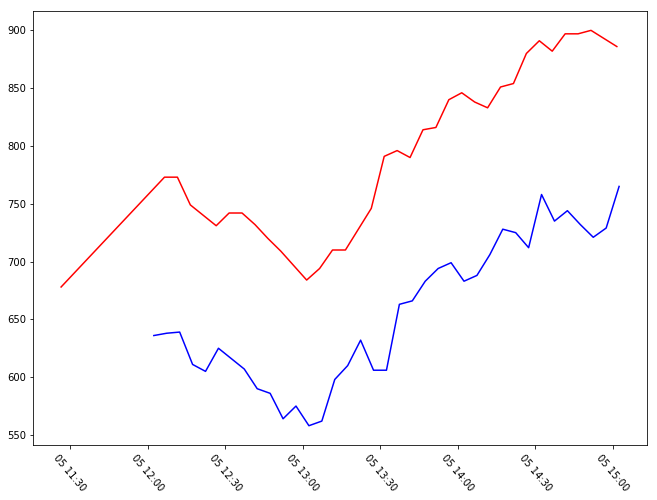

In [175]:
import numpy as np

# evenly sampled time at 200ms intervals
#t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(ba9["time"], ba9["co2"], 'r', e7["time"], e7["co2"], 'b')

degrees = -50
plt.xticks(rotation=degrees)
#plt.xticks(np.arange(e7["time"]))
fig = plt.gcf()
fig.set_size_inches(11,8)

plt.show()


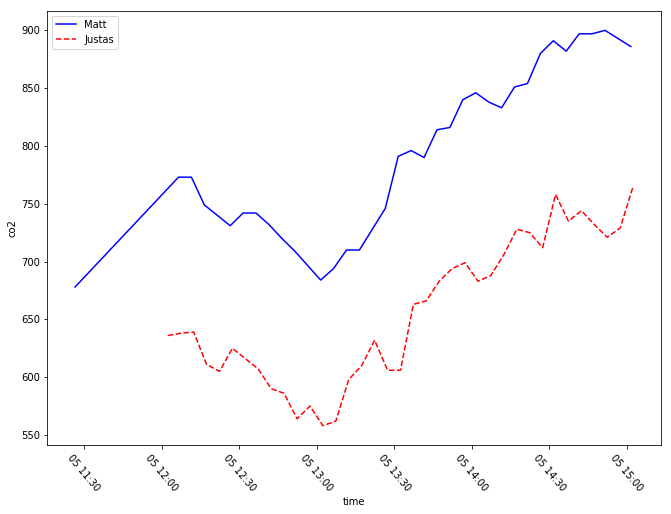

In [179]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(ba9["time"], ba9["co2"] , '-b', label='Matt')
ax.plot(e7["time"], e7["co2"], '--r', label='Justas')
#ax.axis('equal')
leg = ax.legend();
degrees = -50
plt.xticks(rotation=degrees)
plt.xlabel(xlabel="time")
plt.ylabel(ylabel="co2")

fig = plt.gcf()
fig.set_size_inches(11,8)

plt.show()


In [183]:
data_FN07=[]
for i in ["05"]:
    path="/home/jb2328/Decoder/b64_decoder/data_bin/2020/03/"+i+"/"
    files=sorted(os.listdir(path))
    for u in files:
        msg=read_file(path+u)
        clear_output(wait=True)
        display(path+u)
        #display(msg)        
        #try:
        msg_json=eval(msg)#json.loads(msg)
       # except:
        #    continue
        #if msg_json["dev_id"]!="ijl20-sodaq-ttn":
            #print(msg_json["dev_id"])
          
        if msg_json["dev_id"] in FN07:
            #display("Found")
            try:
                data_FN07.append({"id":msg_json["dev_id"], "time":msg_json["acp_ts"], "temperature":msg_json["payload_cooked"]["temperature"], "humidity":msg_json["payload_cooked"]["humidity"]})
            except:
                continue

'/home/jb2328/Decoder/b64_decoder/data_bin/2020/03/05/1583421627_15:20-05-03-2020.json'

In [184]:
data_FN07

[{'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T11:26:32.971623271Z',
  'temperature': 22.5,
  'humidity': 30},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-03-05T12:02:25.089536152Z',
  'temperature': 22.9,
  'humidity': 30},
 {'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T12:06:32.805253619Z',
  'temperature': 22.6,
  'humidity': 31},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-03-05T12:07:25.07388938Z',
  'temperature': 22.9,
  'humidity': 30},
 {'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T12:11:32.786872263Z',
  'temperature': 22.7,
  'humidity': 31},
 {'id': 'elsys-eye-044504',
  'time': '2020-03-05T12:12:07.139990138Z',
  'temperature': 22.7,
  'humidity': 31},
 {'id': 'elsys-co2-0461e7',
  'time': '2020-03-05T12:12:25.043110263Z',
  'temperature': 22.9,
  'humidity': 30},
 {'id': 'elsys-co2-041ba9',
  'time': '2020-03-05T12:16:32.768619206Z',
  'temperature': 22.7,
  'humidity': 31},
 {'id': 'elsys-eye-044501',
  'time': '2020-03-05T12:16:34.970642098Z',
  'temperature': 

In [190]:
df_FNO7 = pd.DataFrame()
for i in data_FN07:
    #print({"time": i["time"], "id": i["id"], "co2": i["co2"]})
    df_FNO7=df_FNO7.append({"time": pd.to_datetime(i["time"]), "id": i["id"], "temperature": i["temperature"], "humidity": i["humidity"]}, ignore_index=True)
    

In [191]:
ba9_all=df_FNO7.loc[df_FNO7['id'] == 'elsys-co2-041ba9']
e7_all=df_FNO7.loc[df_FNO7['id'] == 'elsys-co2-0461e7']

eye501_all=df_FNO7.loc[df_FNO7['id'] == 'elsys-eye-044501']
eye504_all=df_FNO7.loc[df_FNO7['id'] == 'elsys-eye-044504']

In [192]:
eye504_all.head()

,humidity,id,temperature,time
5,31.0,elsys-eye-044504,22.7,2020-03-05 12:12:07.139990138+00:00
14,30.0,elsys-eye-044504,22.7,2020-03-05 12:27:07.329435771+00:00
34,31.0,elsys-eye-044504,22.7,2020-03-05 13:12:06.886398469+00:00
43,31.0,elsys-eye-044504,22.8,2020-03-05 13:27:06.827940547+00:00
47,31.0,elsys-eye-044504,22.8,2020-03-05 13:32:06.800831701+00:00


In [205]:
df_FNO7

,humidity,id,temperature,time
0,30.0,elsys-co2-041ba9,22.5,2020-03-05 11:26:32.971623271+00:00
1,30.0,elsys-co2-0461e7,22.9,2020-03-05 12:02:25.089536152+00:00
2,31.0,elsys-co2-041ba9,22.6,2020-03-05 12:06:32.805253619+00:00
3,30.0,elsys-co2-0461e7,22.9,2020-03-05 12:07:25.073889380+00:00
4,31.0,elsys-co2-041ba9,22.7,2020-03-05 12:11:32.786872263+00:00
5,31.0,elsys-eye-044504,22.7,2020-03-05 12:12:07.139990138+00:00
6,30.0,elsys-co2-0461e7,22.9,2020-03-05 12:12:25.043110263+00:00
7,31.0,elsys-co2-041ba9,22.7,2020-03-05 12:16:32.768619206+00:00
8,30.0,elsys-eye-044501,23.0,2020-03-05 12:16:34.970642098+00:00
9,30.0,elsys-co2-0461e7,23.0,2020-03-05 12:17:25.030596788+00:00


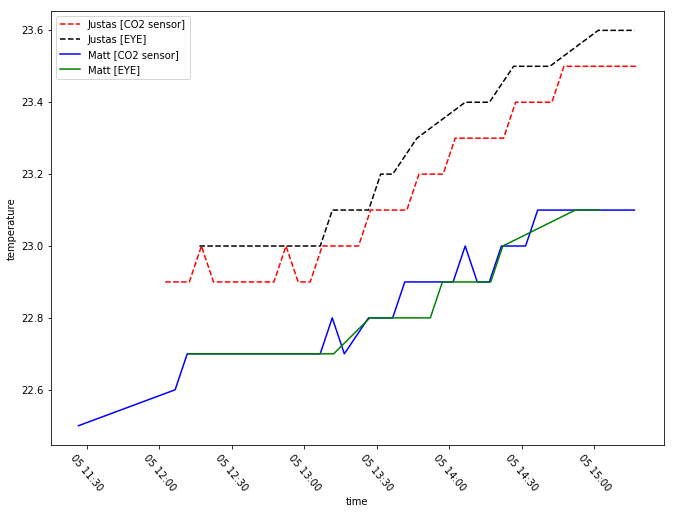

In [206]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()

ax.plot(e7_all["time"], e7_all["temperature"], '--r', label='Justas [CO2 sensor]')
ax.plot(eye501_all["time"], eye501_all["temperature"], '--k', label='Justas [EYE]')

ax.plot(ba9_all["time"], ba9_all["temperature"] , '-b', label='Matt [CO2 sensor]')
ax.plot(eye504_all["time"], eye504_all["temperature"] , '-g', label='Matt [EYE]')

#ax.axis('equal')
leg = ax.legend();
degrees = -50
plt.xticks(rotation=degrees)
plt.xlabel(xlabel="time")
plt.ylabel(ylabel="temperature")

fig = plt.gcf()
fig.set_size_inches(11,8)

plt.show()

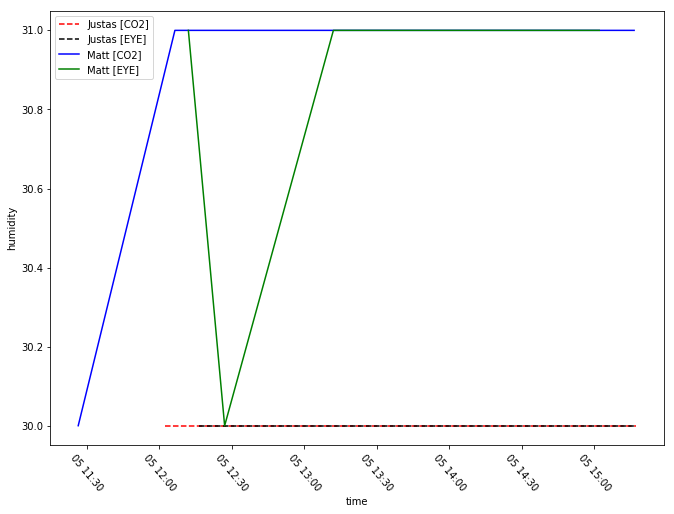

In [204]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()

ax.plot(e7_all["time"], e7_all["humidity"], '--r', label='Justas [CO2]')
ax.plot(eye501_all["time"], eye501_all["humidity"], '--k', label='Justas [EYE]')

ax.plot(ba9_all["time"], ba9_all["humidity"] , '-b', label='Matt [CO2]')
ax.plot(eye504_all["time"], eye504_all["humidity"] , '-g', label='Matt [EYE]')

#ax.axis('equal')
leg = ax.legend();
degrees = -50
plt.xticks(rotation=degrees)
plt.xlabel(xlabel="time")
plt.ylabel(ylabel="humidity")

fig = plt.gcf()
fig.set_size_inches(11,8)

plt.show()

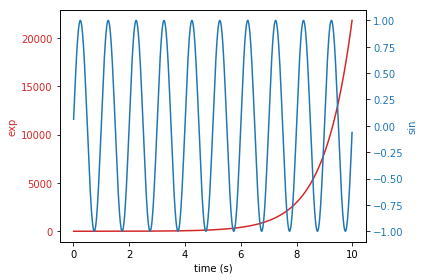

In [198]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

